# **Практическое задание №4. Предсказание стоимость услуг репетитора**

В этом домашнем задании вам предстоит предсказать среднюю стоимость услуг репетитора за минуту (в рублях) на основе различных данных о нем. Вам будут доступны характеристики репетиторов: предмет преподавания, рейтинг, количество отзывов, описание опыта, образование и пр.

Вашей задачей будет построить модель, которая сможет предсказывать стоимость минутной консультации для новых репетиторов на основе предоставленной информации.


# **Что нужно сделать**
1) Принять участие в соревновании на Kaggle по ссылке.
2) Разработать и оформить решение в ноутбуке:
3) Исследование и анализ датасета.
4) Предобработка данных.
5) Feature Engineering (если необходимо).
6) Подбор признаков, их анализ и оценка важности.
7) Обучение нескольких моделей, их сравнение.
8) Подбор гиперпараметров.
9) Выбор лучшей модели и объяснение выбора.
10) Предсказание на тестовых данных.

In [8]:
# Работа с данными 
import pandas as pd
import numpy as np

# Графики
import matplotlib.pyplot as plt
import seaborn as sns

# Стандартизация
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

# Разделение датасета и оценка качества моделей
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Вывод фото
from IPython.display import Image

# Регрессоры
from sklearn.svm import SVR

from ast import literal_eval

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

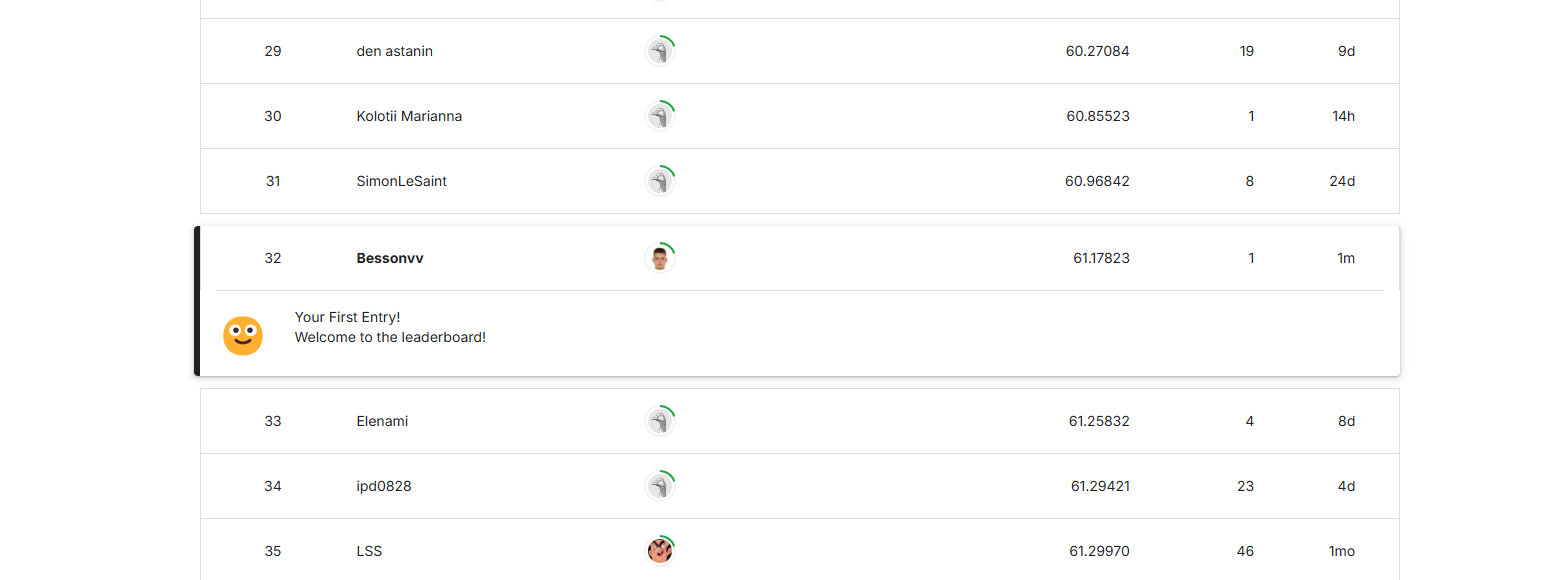

In [25]:
Image(filename='D:\mifi\myvenv\image.png', width=800)

# **Исследование и анализ датасета**
## **Columns**
1) `предмет` - subject taught by the teacher
2) `ФИО` - tutor's name
3) `tutor_head_tags` - What level does the tutor prepare for?
4) `tutor_rating` - Tutor's rating
5) `tutor_reviews` - Number of reviews
6) `description` - The "About me" field, which is filled by the tutor himself
7) `experience_desc` - Description of the tutor experience
8) `Education_i` - The university the tutor graduated from
9) `Desc_Education_i` - Faculty, specialty, year of graduation and other information about education i
10) `Ученая степень i` - Academic degree
11) `Ученое звание i` - Academic title
12) `categories` - Categories of students that the tutor is ready to take
13) `mean_price` - Average cost of tutor services per minute
etc.


In [9]:
df = pd.read_excel('D:/mifi/myvenv/train.xlsx')
display(df.head())
display(df.describe())

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
0,0,matematika,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",...,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
1,1,matematika,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",...,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667
2,2,informatika,Репетитор по информатике Мотроненко Инна Конст...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",...,Школьный преподаватель,11 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333
3,3,matematika,Репетитор по математике Логинова Елизавета Ал...,"['Школьная программа', 'Математический анализ'...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",...,Частный преподаватель,5 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667
4,4,matematika,Репетитор по математике Харланов Олег Викторо...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",...,Частный преподаватель,19 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667


,Unnamed: 0,tutor_rating,tutor_reviews,mean_price
count,4548.000000,3959.000000,4548.000000,4548.000000
mean,2273.500000,1.895933,2.989006,16.197949
std,1313.038842,2.280103,8.516939,10.485108
min,0.000000,0.000000,0.000000,0.041667
25%,1136.750000,0.000000,0.000000,10.000000
50%,2273.500000,0.000000,0.000000,15.000000
75%,3410.250000,4.000000,2.000000,20.888889
max,4547.000000,5.000000,152.000000,100.000000


# **Предобработка данных**

In [10]:
def preprocessing(df):
    # Создание жесткой ссылки
    df_preprocessing = df.copy()

    # Удаление столбцов с уникальной информацией
    df_preprocessing = df_preprocessing.drop(columns=[
        'Unnamed: 0', 'ФИО', 'description', 'experience_desc'
        ])

    # Null значения
    df_preprocessing = df_preprocessing.fillna(0)

    df_preprocessing['Ученое звание 1'] = df_preprocessing['Ученое звание 1'].astype(str).str.lower().str.strip().fillna(0)
    df_preprocessing['Ученое звание 2'] = df_preprocessing['Ученое звание 2'].astype(str).str.lower().str.strip().fillna(0)

    df_preprocessing['Ученая степень 1'] = df_preprocessing['Ученая степень 1'].astype(str).str.lower().str.strip().fillna(0)
    df_preprocessing['Ученая степень 2'] = df_preprocessing['Ученая степень 2'].astype(str).str.lower().str.strip().fillna(0)

    df_preprocessing['status'] = df_preprocessing['status'].astype(str).str.lower().str.strip().fillna(0)

    return df_preprocessing

df_preprocessing = preprocessing(df)

## **Feature engineering**

In [11]:
class DataPreprocessor:
    # Инициализация списоков ключевых слов и статусов
    def __init__(self):
        self.math_keywords = ["матем", "физ", "техн", "машин", "косм"]
        self.informatics_keywords = ["информ", "кибер", "техн", "косм"]
        self.pedagogical_keywords = ["педагог", "преподав", "учит"]
        self.status_list = [
            'университетский преподаватель',
            'аспирант или ординатор очной формы обучения',
            'частный преподаватель',
            'школьный преподаватель',
            'студент'
        ]
        self.science_degrees = ["доктор", "кандидат"]
        self.science_grades = ["старший научный сотрудник", "профессор", "доцент"]

        # Атрибуты для хранения множеств тегов
        self.tutor_head_tags_set = set()
        self.categories_tags_set = set()

    def encode_tags(self, df, column_name, is_training=True):
        """
        One-hot encoding для тегов.
        :param df: DataFrame для обработки.
        :param column_name: Название столбца с тегами.
        :param is_training: Флаг, указывающий, является ли это тренировочными данными.
        :return: Обработанный DataFrame.
        """
        if is_training:
            # Создаем множество тегов из тренировочных данных
            tags_set = set()
            for str_list in df[column_name]:
                list_of_tags = self._parse_tags(str_list)
                tags_set.update(list_of_tags)

            # Сохраняем множество тегов в соответствующий атрибут
            if column_name == "tutor_head_tags":
                self.tutor_head_tags_set = tags_set
            elif column_name == "categories":
                self.categories_tags_set = tags_set

        else:
            # Используем ранее сохраненное множество тегов
            if column_name == "tutor_head_tags":
                tags_set = self.tutor_head_tags_set
            elif column_name == "categories":
                tags_set = self.categories_tags_set

        # Добавляем столбцы на основе множества тегов
        for tag in tags_set:
            df[tag] = df[column_name].apply(lambda x: 1 if tag in self._parse_tags(x) else 0)

        # Удаляем исходный столбец с тегами
        df.drop(columns=[column_name], inplace=True)

        return df
    
    def _parse_tags(self, str_list):
        """
        Вспомогательная функция для преобразования строки в список тегов.
        :param str_list: Строка, представляющая список тегов.
        :return: Список тегов.
        """
        from ast import literal_eval
        try:
            return literal_eval(str_list)
        except (ValueError, SyntaxError):
            return []

    def create_profile_subject_column(self, row):
        """Создание столбца 'профильный предмет'."""
        descriptions = " ".join(
            [str(row[f"Desc_Education_{i}"]) for i in range(1, 7)] +
            [str(row[f"Ученая степень {i}"]) for i in range(1, 3)]
        ).lower()

        if row['предмет'] == "matematika":
            return 1 if any(keyword in descriptions for keyword in self.math_keywords) else 0
        elif row['предмет'] == "informatika":
            return 1 if any(keyword in descriptions for keyword in self.informatics_keywords) else 0
        return 0

    def create_pedagogical_education_column(self, row):
        """Создание столбца 'педагогическое образование'."""
        descriptions = " ".join(
            [str(row[f"Desc_Education_{i}"]) for i in range(1, 7)] +
            [str(row[f"Ученая степень {i}"]) for i in range(1, 3)]
        ).lower()

        return 1 if any(keyword in descriptions for keyword in self.pedagogical_keywords) else 0

    def process_experience(self, df):
        """Обработка опыта работы."""
        df['experience'] = df['experience'].apply(
            lambda x: int(x.split()[0]) if isinstance(x, str) and x.split() else 0
        )
        return df

    def process_science_degree(self, df):
        """Обработка ученых степеней."""
        for degree in self.science_degrees:
            for i in range(1, 3):
                df[f"{degree} {i}"] = df[f"Ученая степень {i}"].apply(
                    lambda x: 1 if isinstance(x, str) and degree in x else 0
                )
        df.drop(columns=[f"Ученая степень {i}" for i in range(1, 3)], inplace=True)
        return df

    def process_science_grade(self, df):
        """Обработка ученых званий."""
        for grade in self.science_grades:
            for i in range(1, 3):
                df[f"{grade} {i}"] = df[f"Ученое звание {i}"].apply(
                    lambda x: 1 if isinstance(x, str) and grade in x else 0
                )
        df.drop(columns=[f"Ученое звание {i}" for i in range(1, 3)], inplace=True)
        return df

    def process_status(self, df):
        """Обработка статусов."""
        for status in self.status_list:
            df[status] = df['status'].apply(lambda x: 1 if isinstance(x, str) and status in x else 0)
        df.drop(columns=['status'], inplace=True)
        return df

    def process_subjects(self, df):
        """Обработка предметов."""
        df['математика'] = df['предмет'].apply(lambda x: 1 if 'matematika' in x else 0)
        df['информатика'] = df['предмет'].apply(lambda x: 1 if 'informatika' in x else 0)
        df.drop(columns=['предмет'], inplace=True)
        return df

    
    # Ф-ция для train 
    def preprocess(self, df, is_training=True):
        """
        Основная функция предобработки данных.
        :param df: DataFrame для обработки.
        :param is_training: Флаг, указывающий, является ли это тренировочными данными.
        :return: Обработанный DataFrame.
        """
        # One-hot encoding для тегов
        df = self.encode_tags(df, 'tutor_head_tags', is_training)
        df = self.encode_tags(df, 'categories', is_training)

        # Создание новых столбцов
        df['профильный предмет'] = df.apply(self.create_profile_subject_column, axis=1)
        df['педагогическое образование'] = df.apply(self.create_pedagogical_education_column, axis=1)

        # Обработка других столбцов
        df = self.process_experience(df)
        df = self.process_science_degree(df)
        df = self.process_science_grade(df)
        df = self.process_status(df)
        df = self.process_subjects(df)

        # Удаление лишних столбцов
        columns_to_drop = [
            'Education_1', 'Education_2', 'Education_3', 'Education_4', 'Education_5', 'Education_6',
            'Desc_Education_1', 'Desc_Education_2', 'Desc_Education_3', 'Desc_Education_4', 'Desc_Education_5', 'Desc_Education_6'
        ]
        df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

        return df


# Пример использования
preprocessor = DataPreprocessor()
df_preprocessing = preprocessor.preprocess(df_preprocessing, is_training=True)
df_preprocessing.head()

,tutor_rating,tutor_reviews,experience,mean_price,Подготовка к олимпиадам,Уравнения мат физики,Mathematik auf Deutsch,Математическая логика,GMAT (математическая часть),Подготовка к ЕГЭ,...,профессор 2,доцент 1,доцент 2,университетский преподаватель,аспирант или ординатор очной формы обучения,частный преподаватель,школьный преподаватель,студент,математика,информатика
0,5.0,2,31,16.666667,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,4.0,7,8,11.666667,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2,0.0,0,11,23.333333,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,4.0,19,5,0.116667,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,0.0,0,19,16.666667,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


# **Обучение нескольких моделей, их сравнение**

In [12]:
X=df_preprocessing.drop(columns='mean_price')
y=df_preprocessing['mean_price']

# Генерация синтетических данных
np.random.seed(42)

# Создание и обучение модели SVM-регрессии
epsilon = 0.1
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=epsilon)
svr_rbf.fit(X, y)

# Предсказания
y_pred = svr_rbf.predict(X)

# Вычисление MSE
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 38.2227


# **Подбор гиперпарметров**

In [13]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Список моделей для сравнения
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVR (RBF)": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
}

# Обучение моделей и вычисление MSE
results = {}
for name, model in models.items():
    # Обучение модели
    model.fit(X_train, y_train)
    
    # Предсказания
    y_pred = model.predict(X_test)
    
    # Вычисление MSE
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse

# Вывод результатов
print("Comparison of models based on MSE:")
for name, mse in results.items():
    print(f"{name}: {mse:.4f}")


# Определение гиперпараметров для перебора
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Создание модели
rf = RandomForestRegressor(random_state=42)

# Поиск лучших гиперпараметров
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшие параметры и MSE
print("Best Parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

Comparison of models based on MSE:
Linear Regression: 105.2737
Decision Tree: 158.9415
Random Forest: 101.8748
SVR (RBF): 118.1770
Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Best MSE: 86.72239762917874


# **Выбор лучшей модели и объяснение выбора**

Была выбрана модель RandomForestRegressor, так как MSE наименьшая

In [14]:
rfr=RandomForestRegressor(**grid_search.best_params_, random_state=42)
rfr.fit(X, y)
y_pred = rfr.predict(X)
mse = mean_squared_error(y, y_pred)
print(f"Test MSE with best parameters: {mse:.4f}")

Test MSE with best parameters: 51.9412


# **Предсказывание на тестовых данных**

In [22]:
X_test = pd.read_excel('D:/mifi/myvenv/test.xlsx')
y_test = pd.read_csv('D:/mifi/myvenv/sample_submit.csv')

X_test_new = preprocessing(X_test)
X_test_new = preprocessor.preprocess(X_test_new, is_training=False)

y_test= y_test['mean_price']

y_pred_test = rfr.predict(X_test_new)
#svr_rbf.predict(X_test_new)

print(len(y_pred_test))
mse_new = mean_squared_error(y_test, y_pred_test)

print(f"Mean Squared Error (MSE): {mse_new:.4f}")

# Создание DataFrame для выгрузки
submission = pd.DataFrame({
    "index": y_test.index,  # Используем индексы y_test как id
    "mean_price": y_pred_test  # Предсказанные значения
})

# Сохранение в CSV-файл
submission.to_csv("submission.csv", index=False)

print("Файл submission.csv успешно создан!")

1516
Mean Squared Error (MSE): 309.5496
Файл submission.csv успешно создан!


In [23]:
sub = pd.read_csv('D:/mifi/myvenv/submission.csv')
sub.head()

,index,mean_price
0,0,18.888149
1,1,6.336453
2,2,18.367924
3,3,10.443154
4,4,8.623317
